<a href="https://colab.research.google.com/github/raj-vijay/mv/blob/master/03_Linear_Filters_Machine_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Filters in OpenCV**

Here, we apply different linear filters to an image and visualise the results. The filters are apply to the image of a cat, loaded from Google Colab.

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Save Image from URL

In [84]:
# Download the seeds data using wget (Linux)
!wget https://raw.githubusercontent.com/raj-vijay/mv/master/images/cat.png

--2020-02-23 16:43:32--  https://raw.githubusercontent.com/raj-vijay/mv/master/images/cat.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 663451 (648K) [image/png]
Saving to: ‘cat.png.1’

cat.png.1           100%[===================>] 647.90K  --.-KB/s    in 0.06s   

2020-02-23 16:43:33 (10.3 MB/s) - ‘cat.png.1’ saved [663451/663451]



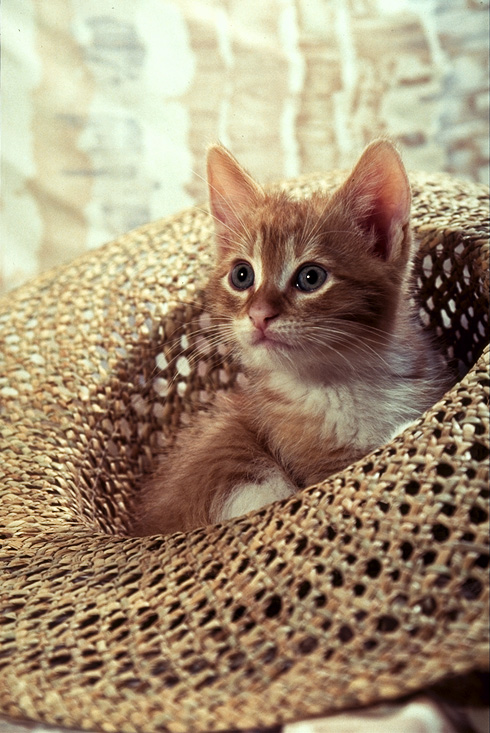

In [85]:
input_image = cv2.imread("cat.png")
# Below code not supported by Colab
# cv2.imshow("input", input_image)
cv2_imshow(input_image)

Load the input image and convert it into grayscale. Display both the original and the grayscale image.

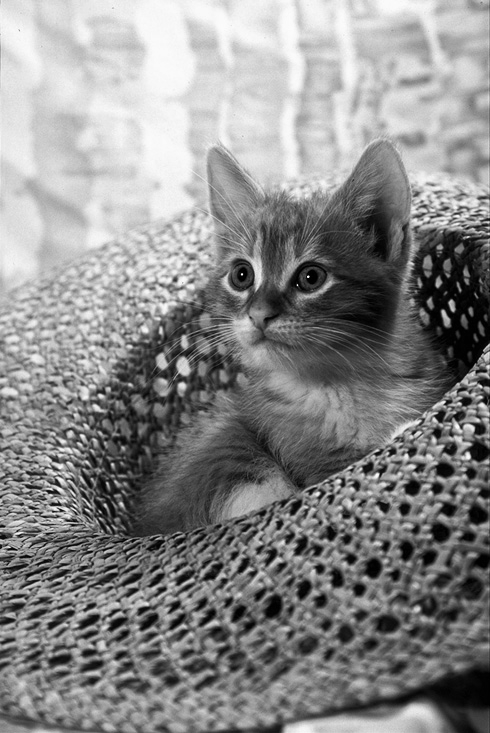

In [86]:
img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(img)

**Sobel Filter**

Create Sobel filter mask to detect edges in x- and in y-direction. Filter the input image with these masks and display the results.

The Sobel operator, sometimes called the Sobel–Feldman operator or Sobel filter, is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges.

Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. In mathematics (in particular, functional analysis) convolution is a mathematical operation on two functions (f and g) that produces a third function expressing how the shape of one is modified by the other. The term convolution refers to both the result function and to the process of computing it. It is defined as the integral of the product of the two functions after one is reversed and shifted.

In [0]:
sobel_kernel_x = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])
sobel_kernel_y = np.array([[1,  2, 1],
                           [0,  0, 0],
                           [-1,-2,-1]])
    
sobel_x = cv2.filter2D(img, -1, sobel_kernel_x)
sobel_y = cv2.filter2D(img, -1, sobel_kernel_y)

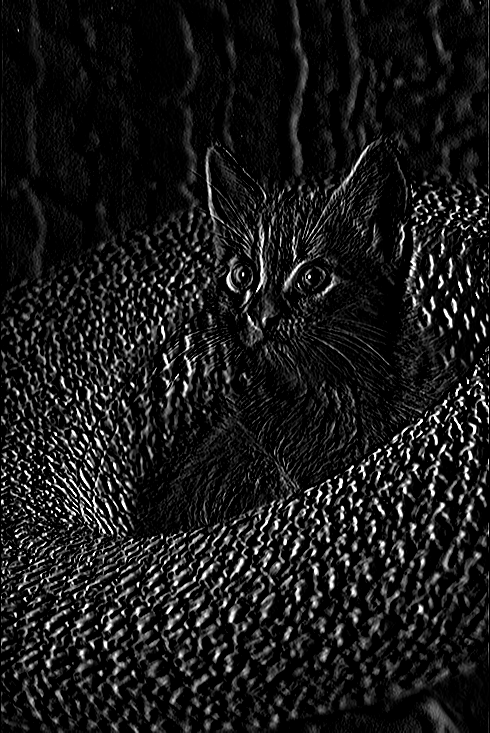

In [88]:
cv2_imshow(sobel_x)

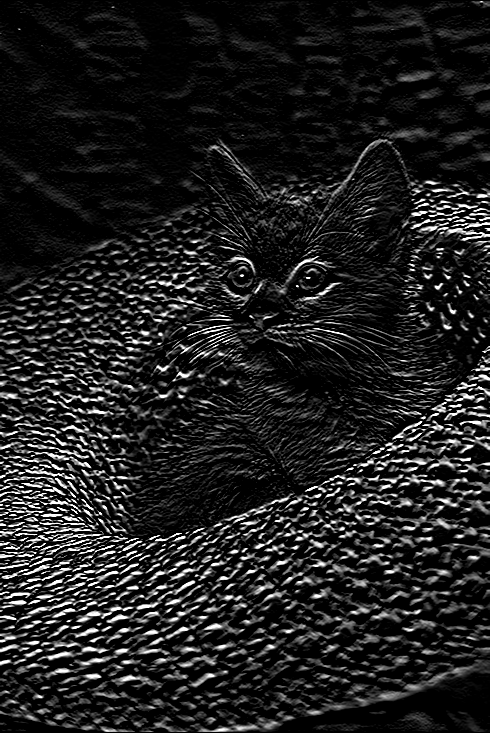

In [89]:
cv2_imshow(sobel_y)

**Filter Masks for the Derivatives of the Gaussian**

In image processing, a Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. The visual effect of this blurring technique is a smooth blur resembling that of viewing the image through a translucent screen, distinctly different from the bokeh effect produced by an out-of-focus lens or the shadow of an object under usual illumination. Gaussian smoothing is also used as a pre-processing stage in computer vision algorithms in order to enhance image structures at different scales—see scale space representation and scale space implementation.

![alt text](https://raw.githubusercontent.com/raj-vijay/mv/master/images/Gaussian%20Derivative.png)

using 𝜎=5 and 𝜎=10.

In [0]:
import matplotlib.pylab as plt

In [0]:
sigma = 10
x,y = np.meshgrid(np.arange(0,len(img[0])),np.arange(0,len(img)))        
dog_kernel_x = -(x-len(img[0])/2)*np.exp(-((x-len(img[0])/2)**2+(y-len(img)/2)**2)/(2*sigma**2))/(2*np.pi*sigma**4)
dog_kernel_y = -(y-len(img)/2)*np.exp(-((x-len(img[0])/2)**2+(y-len(img)/2)**2)/(2*sigma**2))/(2*np.pi*sigma**4)

In [0]:
dog_x = cv2.filter2D(img, -1, dog_kernel_x)
dog_y = cv2.filter2D(img, -1, dog_kernel_y)

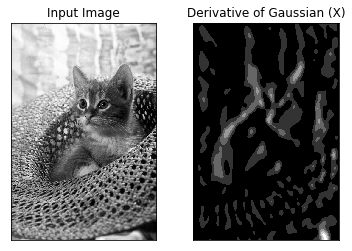

In [93]:
# plt.imshow(dog_x/np.max(dog_x), cmap = 'gray')
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dog_x/np.max(dog_x), cmap = 'gray')
plt.title('Derivative of Gaussian (X)'), plt.xticks([]), plt.yticks([])
plt.show()

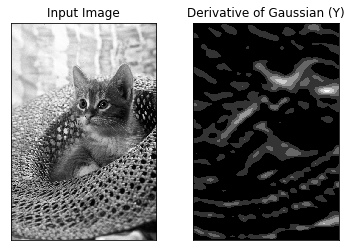

In [103]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dog_y/np.max(dog_y), cmap = 'gray')
plt.title('Derivative of Gaussian (Y)'), plt.xticks([]), plt.yticks([])

plt.show()